In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_theme()

In [2]:
# load data and check the head or tail
df = sns.load_dataset('titanic')
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


### Exploration

In [3]:
# explore basic info of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [4]:
# check basic descriptive statistics of data set
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.fillna(df.mean(), inplace=True)
df.fillna(df.mode(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         204 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [6]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,891,NaN,NaN,NaN,29.6991,13.002,0.42,22,29.6991,35,80
sibsp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# drop 'deck' column as it only has < 22% of data points and is useless although it could have proven useful if it were available.
df.drop('deck', inplace=True, axis=1)
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

### Distribution

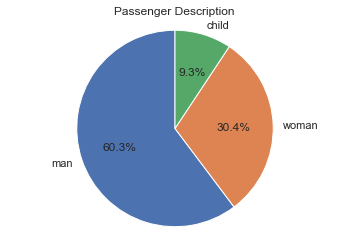

In [8]:
value_counts = df['who'].value_counts()

# Extract data for the pie chart
labels = value_counts.index
sizes = value_counts.values

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Add a title
plt.title('Passenger Description')

# Display the chart
plt.show()

<AxesSubplot:xlabel='fare', ylabel='age'>

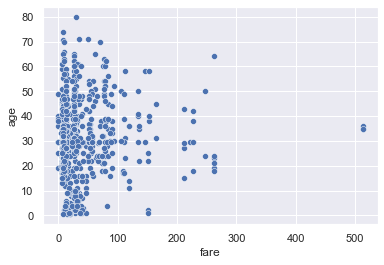

In [9]:
sns.scatterplot(data=df, x='fare', y='age')

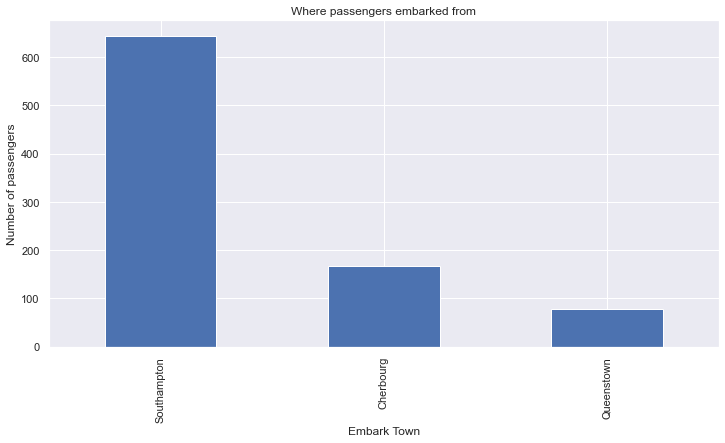

In [10]:
embark_town = df['embark_town'].value_counts()

plt.figure(figsize=(12,6))

embark_town.plot(kind='bar', color='b')
plt.title('Where passengers embarked from')
plt.xlabel('Embark Town')
plt.ylabel('Number of passengers')
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [10]:
# check for nummeric column and plot their distribution subsequently
df.select_dtypes(include='number').columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

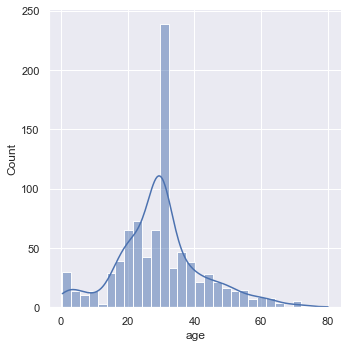

In [11]:
sns.displot(data=df, x='age', kde=True, color='b')

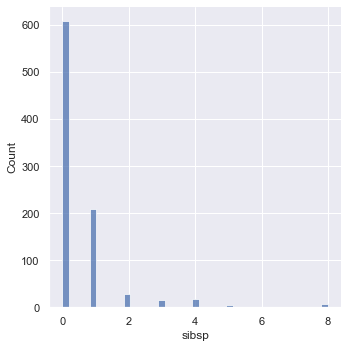

In [12]:
sns.displot(data=df, x='sibsp')

<AxesSubplot:xlabel='parch', ylabel='Count'>

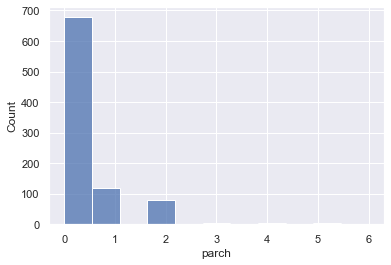

In [13]:
sns.histplot(data=df, x='parch')

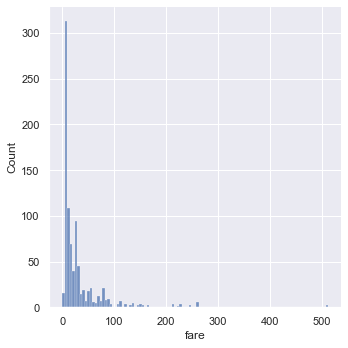

In [14]:
sns.displot(data=df, x='fare')

### Categorical

<AxesSubplot:xlabel='pclass', ylabel='age'>

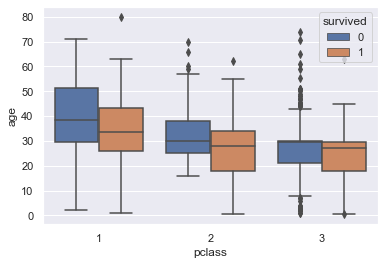

In [15]:
sns.boxplot(data=df, x='pclass', y='age', hue='survived')

<AxesSubplot:xlabel='sex', ylabel='age'>

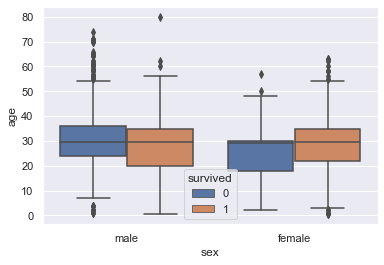

In [16]:
sns.boxplot(data=df, x='sex', y='age', hue='survived')

<AxesSubplot:xlabel='who', ylabel='sibsp'>

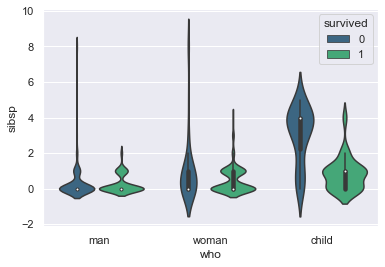

In [17]:
sns.violinplot(data=df, x='who', y='sibsp', hue='survived',palette='viridis')

<AxesSubplot:xlabel='sex', ylabel='count'>

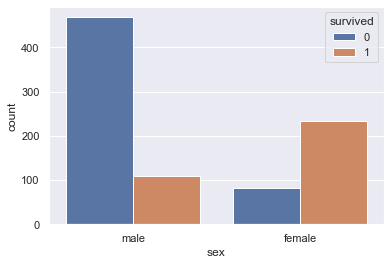

In [19]:
sns.countplot(data=df, x='sex', hue='survived')

<AxesSubplot:xlabel='embark_town', ylabel='count'>

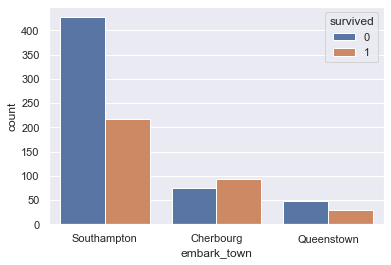

In [20]:
sns.countplot(data=df, x='embark_town', hue='survived')

<AxesSubplot:xlabel='class', ylabel='count'>

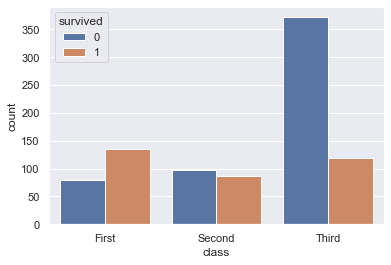

In [21]:
sns.countplot(data=df, x='class', hue='survived')

<AxesSubplot:xlabel='who', ylabel='count'>

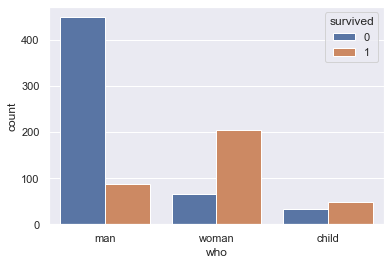

In [22]:
sns.countplot(data=df, x='who', hue='survived')

<AxesSubplot:xlabel='adult_male', ylabel='count'>

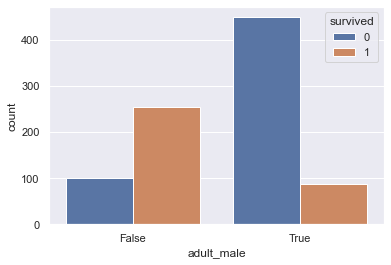

In [23]:
sns.countplot(data=df, x='adult_male', hue='survived')

<AxesSubplot:>

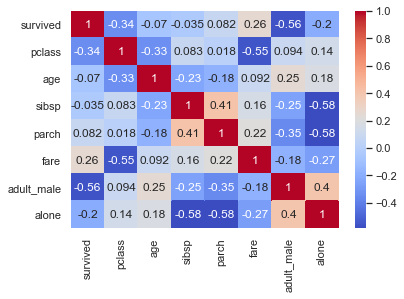

In [24]:
# correlation and heatmap
correlation = df.corr()
sns.heatmap(correlation, cmap='coolwarm',annot=True)